In [52]:
%pylab inline
import numpy as np
import pandas as pd
import imageio
import os
from sklearn.metrics import accuracy_score
import tensorflow as tf
import keras


Populating the interactive namespace from numpy and matplotlib


C:\Users\hp\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test', 'seed']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [75]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, InputLayer

In [53]:
seed=128
rng=np.random.RandomState(seed)

In [54]:
root_dir=os.path.abspath('C:/Users/hp/Desktop/Analytics Vidhya/Identify the Digits')
data_dir=os.path.join(root_dir,'data')
sub_dir=os.path.join(root_dir,'sub')

In [55]:
#check for existence
os.path.exists(root_dir)
os.path.exists(data_dir)
#os.path.exists(sub_dir)

True

In [56]:
#load datasets
train=pd.read_csv(os.path.join(data_dir,'Train','train.csv'))
test=pd.read_csv(os.path.join(data_dir,'Test.csv'))
sample_submission=pd.read_csv(os.path.join(data_dir,'Sample_Submission.csv'))

In [57]:
train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


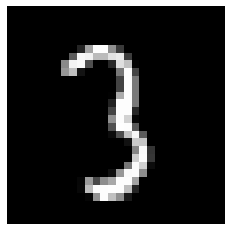

In [58]:
img_name=rng.choice(train.filename)
filepath=os.path.join(data_dir,'Train','Images','train',img_name)
img=imageio.imread(filepath,as_gray=True)
pylab.imshow(img,cmap='gray')
pylab.axis('off')
pylab.show()

In [59]:
img

Array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [60]:
#store all images into numpy arrays
temp=[]
for img_name in train.filename:
    image_path=os.path.join(data_dir,'Train','Images','train',img_name)
    img=imageio.imread(image_path,as_gray=True)
    img=img.astype('float32')
    temp.append(img)
    train_x=np.stack(temp)
    train_x /= 255.0
    train_x=train_x.reshape(-1,784).astype('float32')
    

temp=[]
for img_name in test.filename:
    image_path=os.path.join(data_dir,'Train','Images','test',img_name)
    img=imageio.imread(image_path,as_gray=True)
    img=img.astype('float32')
    temp.append(img)
    test_x=np.stack(temp)
    test_x /= 255.0
    test_x=test_x.reshape(-1,784).astype('float32')    

In [61]:
train_y=keras.utils.np_utils.to_categorical(train.label.values)

In [62]:
train_y.shape

(49000, 10)

In [63]:
train_x.shape

(49000, 784)

In [64]:
#split size of 70:30
split_size=int(train_x.shape[0]*0.7)
train_x,val_x=train_x[:split_size],train_x[split_size:]
train_y,val_y=train_y[:split_size],train_y[split_size:]

train.label.loc[split_size:]

34300    3
34301    1
34302    6
34303    8
34304    3
        ..
48995    2
48996    4
48997    9
48998    3
48999    0
Name: label, Length: 14700, dtype: int64

In [65]:
split_size

34300

In [66]:
train_x.shape

(34300, 784)

In [67]:
val_x.shape

(14700, 784)

In [68]:
train_y.shape

(34300, 10)

In [69]:
val_y.shape

(14700, 10)

In [70]:
#Model Building
# define vars 
input_num_units = 784 
hidden_num_units = 50 
output_num_units = 10 
epochs = 5 
batch_size = 128 
# import keras modules 
from keras.models import Sequential 
from keras.layers import Dense 
# create model 
model = Sequential([  Dense(output_dim=hidden_num_units, input_dim=input_num_units, activation='relu'),  Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'), ]) 
# compile the model with necessary attributes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=50)`
  if sys.path[0] == '':
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="softmax", units=10)`
  if sys.path[0] == '':


In [71]:
trained_model = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 [==============================] - 3s 91us/step - loss: 0.5510 - accuracy: 0.8531 - val_loss: 0.3180 - val_accuracy: 0.9103
Epoch 2/5
34300/34300 [==============================] - 1s 34us/step - loss: 0.2675 - accuracy: 0.9248 - val_loss: 0.2566 - val_accuracy: 0.9277
Epoch 3/5
34300/34300 [==============================] - 1s 34us/step - loss: 0.2177 - accuracy: 0.9383 - val_loss: 0.2291 - val_accuracy: 0.9358
Epoch 4/5
34300/34300 [==============================] - 1s 34us/step - loss: 0.1847 - accuracy: 0.9487 - val_loss: 0.2041 - val_accuracy: 0.9417
Epoch 5/5
34300/34300 [==============================] - 1s 34us/step - loss: 0.1604 - accuracy: 0.9544 - val_loss: 0.1851 - val_accuracy: 0.9478


Prediction is:  2


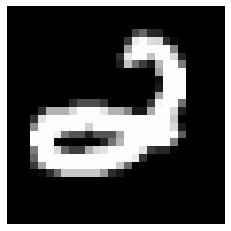

In [73]:
#Model Evaluation
pred = model.predict_classes(test_x) 
img_name = rng.choice(test.filename) 
filepath = os.path.join(data_dir, 'Train', 'Images', 'test', img_name) 
img = imageio.imread(filepath, as_gray=True) 
test_index = int(img_name.split('.')[0]) - train.shape[0] 
print("Prediction is: ", pred[test_index] )
pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show() 

In [74]:
sample_submission.filename = test.filename
sample_submission.label = pred
sample_submission.to_csv(os.path.join(data_dir, 'Sample_Submission.csv'), index=False)

In [76]:
#make model wide
input_num_units = 784 
hidden_num_units = 500 
output_num_units = 10
epochs = 5
batch_size = 128 
wide_model = Sequential([ Dense(output_dim=hidden_num_units, input_dim=input_num_units, activation='relu'),  Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'), ])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=500)`
  import sys
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="softmax", units=10)`
  import sys


In [77]:
wide_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
trained_model_500 = wide_model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 [==============================] - 4s 124us/step - loss: 0.3427 - accuracy: 0.9033 - val_loss: 0.2063 - val_accuracy: 0.9399
Epoch 2/5
34300/34300 [==============================] - 4s 114us/step - loss: 0.1445 - accuracy: 0.9582 - val_loss: 0.1401 - val_accuracy: 0.9591
Epoch 3/5
34300/34300 [==============================] - 4s 123us/step - loss: 0.0949 - accuracy: 0.9718 - val_loss: 0.1128 - val_accuracy: 0.9667
Epoch 4/5
34300/34300 [==============================] - 5s 132us/step - loss: 0.0679 - accuracy: 0.9807 - val_loss: 0.1061 - val_accuracy: 0.9682
Epoch 5/5
34300/34300 [==============================] - 4s 128us/step - loss: 0.0493 - accuracy: 0.9860 - val_loss: 0.0941 - val_accuracy: 0.9718


In [78]:
#make model deep
input_num_units = 784
hidden1_num_units = 50 
hidden2_num_units = 50 
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50 
output_num_units = 10 
epochs = 50 
batch_size = 128 
deep_model = Sequential([ Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'), Dropout(0.2), 
                         Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'), Dropout(0.2), 
                         Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'), Dropout(0.2), 
                         Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'), Dropout(0.2), 
                         Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'), Dropout(0.2), 
                         Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'), ])
#Dropout is a method used to deal with overfitting

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=50)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=50)`
  if sys.path[0] == '':
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=50)`
  del sys.path[0]
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=50)`
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="relu", units=50)`
  from ipykernel impo

In [79]:
deep_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
trained_model_5d_with_drop = deep_model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Train on 34300 samples, validate on 14700 samples
Epoch 1/50
34300/34300 [==============================] - 4s 103us/step - loss: 1.1190 - accuracy: 0.6090 - val_loss: 0.3751 - val_accuracy: 0.8941
Epoch 2/50
34300/34300 [==============================] - 2s 66us/step - loss: 0.4743 - accuracy: 0.8627 - val_loss: 0.2688 - val_accuracy: 0.9280
Epoch 3/50
34300/34300 [==============================] - 2s 62us/step - loss: 0.3705 - accuracy: 0.8999 - val_loss: 0.2282 - val_accuracy: 0.9370
Epoch 4/50
34300/34300 [==============================] - 2s 62us/step - loss: 0.3156 - accuracy: 0.9163 - val_loss: 0.2129 - val_accuracy: 0.9430
Epoch 5/50
34300/34300 [==============================] - 2s 72us/step - loss: 0.2785 - accuracy: 0.9265 - val_loss: 0.2068 - val_accuracy: 0.9432
Epoch 6/50
34300/34300 [==============================] - 2s 70us/step - loss: 0.2698 - accuracy: 0.9285 - val_loss: 0.1993 - val_accuracy: 0.9478
Epoch 7/50
34300/34300 [==============================] - 2s 67us/s

In [80]:
#make model deep and wide both
input_num_units = 784
hidden1_num_units = 500 
hidden2_num_units = 500 
hidden3_num_units = 500 
hidden4_num_units = 500 
hidden5_num_units = 500 
output_num_units = 10 
epochs = 25 
batch_size = 128 
wide_n_deep_model = Sequential([ Dense(output_dim=hidden1_num_units, input_dim=input_num_units, activation='relu'), Dropout(0.2), 
                              Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, activation='relu'), Dropout(0.2),
                              Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units, activation='relu'), Dropout(0.2),
                              Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units, activation='relu'), Dropout(0.2), 
                              Dense(output_dim=hidden5_num_units, input_dim=hidden4_num_units, activation='relu'), Dropout(0.2), 
                              Dense(output_dim=output_num_units, input_dim=hidden5_num_units, activation='softmax'), ])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=784, activation="relu", units=500)`
  # This is added back by InteractiveShellApp.init_path()
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", units=500)`
  if sys.path[0] == '':
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", units=500)`
  del sys.path[0]
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", units=500)`
  
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=500, activation="relu", units=500)`
  from ipyke

In [81]:
wide_n_deep_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
trained_model_deep_n_wide = wide_n_deep_model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))


Train on 34300 samples, validate on 14700 samples
Epoch 1/25
34300/34300 [==============================] - 17s 485us/step - loss: 0.3825 - accuracy: 0.8815 - val_loss: 0.1913 - val_accuracy: 0.9448
Epoch 2/25
34300/34300 [==============================] - 18s 521us/step - loss: 0.1630 - accuracy: 0.9513 - val_loss: 0.1455 - val_accuracy: 0.9586
Epoch 3/25
34300/34300 [==============================] - 19s 550us/step - loss: 0.1143 - accuracy: 0.9659 - val_loss: 0.1170 - val_accuracy: 0.9669
Epoch 4/25
34300/34300 [==============================] - 19s 553us/step - loss: 0.0944 - accuracy: 0.9730 - val_loss: 0.1141 - val_accuracy: 0.9693
Epoch 5/25
34300/34300 [==============================] - 17s 492us/step - loss: 0.0800 - accuracy: 0.9768 - val_loss: 0.1116 - val_accuracy: 0.9705
Epoch 6/25
34300/34300 [==============================] - 16s 466us/step - loss: 0.0708 - accuracy: 0.9785 - val_loss: 0.0993 - val_accuracy: 0.9725
Epoch 7/25
34300/34300 [==============================] 

In [85]:
pred = wide_n_deep_model.predict_classes(test_x) 
sample_submission.filename = test.filename
sample_submission.label = pred 
sample_submission.to_csv(os.path.join(data_dir, 'Sample_Submission.csv'), index=False)

In [86]:
#CNN 


# reshape data 
train_x_temp = train_x.reshape(-1, 28, 28, 1)
val_x_temp = val_x.reshape(-1, 28, 28, 1) 
# define vars
input_shape = (784,) 
input_reshape = (28, 28, 1) 
conv_num_filters = 5 
conv_filter_size = 5 
pool_size = (2, 2) 
hidden_num_units = 50 
output_num_units = 10 
epochs = 5 
batch_size = 128 
cnn_model = Sequential([ InputLayer(input_shape=input_reshape), 
                        Convolution2D(25, 5, 5, activation='relu'), MaxPooling2D(pool_size=pool_size), 
                        Convolution2D(25, 5, 5, activation='relu'), MaxPooling2D(pool_size=pool_size),  
                        Convolution2D(25, 4, 4, activation='relu'), 
                        Flatten(),  
                        Dense(output_dim=hidden_num_units, activation='relu'),  
                        Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'), ]) 
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
trained_model_conv = cnn_model.fit(train_x_temp, train_y, nb_epoch=epochs, batch_size=batch_size, validation_data=(val_x_temp, val_y))

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (5, 5), activation="relu")`
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (5, 5), activation="relu")`
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (4, 4), activation="relu")`
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50)`
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=50, activation="softmax", units=10)`
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 34300 samples, validate on 14700 samples
Epoch 1/5
34300/34300 [==============================] - 32s 938us/step - loss: 0.4907 - accuracy: 0.8469 - val_loss: 0.1677 - val_accuracy: 0.9510
Epoch 2/5
34300/34300 [==============================] - 33s 968us/step - loss: 0.1259 - accuracy: 0.9601 - val_loss: 0.1036 - val_accuracy: 0.9698
Epoch 3/5
34300/34300 [==============================] - 29s 856us/step - loss: 0.0867 - accuracy: 0.9722 - val_loss: 0.0822 - val_accuracy: 0.9765
Epoch 4/5
34300/34300 [==============================] - 26s 756us/step - loss: 0.0667 - accuracy: 0.9788 - val_loss: 0.0701 - val_accuracy: 0.9790
Epoch 5/5
34300/34300 [==============================] - 24s 689us/step - loss: 0.0553 - accuracy: 0.9819 - val_loss: 0.0579 - val_accuracy: 0.9812
